<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/05.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/%ED%95%B4%EC%84%A4/ch05_14_%EC%8B%A4%EC%A0%84%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%9E%90%EC%A0%84%EA%B1%B0_%EC%88%98%EC%9A%94%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.14. 실전 머신러닝 - 자전거 수요 예측

---
* 날짜:
* 이름:

## 학습내용
    - 실제 대회의 데이터셋을 이용해 모델링한다.
    - 성능향상을 위한 작업을 진행한다

## 학습자료

* https://github.com/BaekKyunShin/musthave_mldl_problem_solving_strategy
* https://www.kaggle.com/c/bike-sharing-demand
* https://www.kaggle.com/competitions/bike-sharing-demand/code?competitionId=3948&sortBy=scoreAscending 

## 데이터 불러오기 및 기본 탐색
---

* output 
  * train, test, submission (csv file)
  * noms, cont (리스트)

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
```

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### | 데이터 확보

* 경로 설정

In [ ]:
ds_path =  '/content/drive/MyDrive/dataset/bike-sharing-demand'

* 데이터셋 읽기

In [ ]:
train = pd.read_csv(f'{ds_path}/train.csv')
test = pd.read_csv(f'{ds_path}/test.csv')
submission = pd.read_csv(f'{ds_path}/sampleSubmission.csv')
print(train.shape, test.shape, submission.shape)

(10886, 12) (6493, 9) (6493, 2)


* train  파일 확인

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


* test 파일 확인

In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


* train 요약

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


* test 요약

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### | 피쳐 분포 시각화

* 타겟 (count) 분포 확인

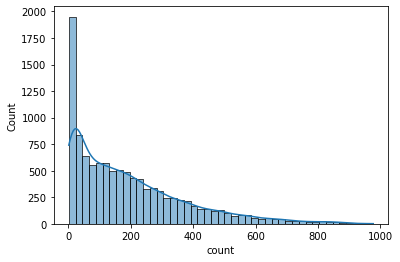

In [ ]:
# 타겟 ; 연속, 회귀문제
sns.histplot(train['count'], kde=True)
plt.show()
# 로그 스케일로 변환 필요

* train 피쳐 분포 확인

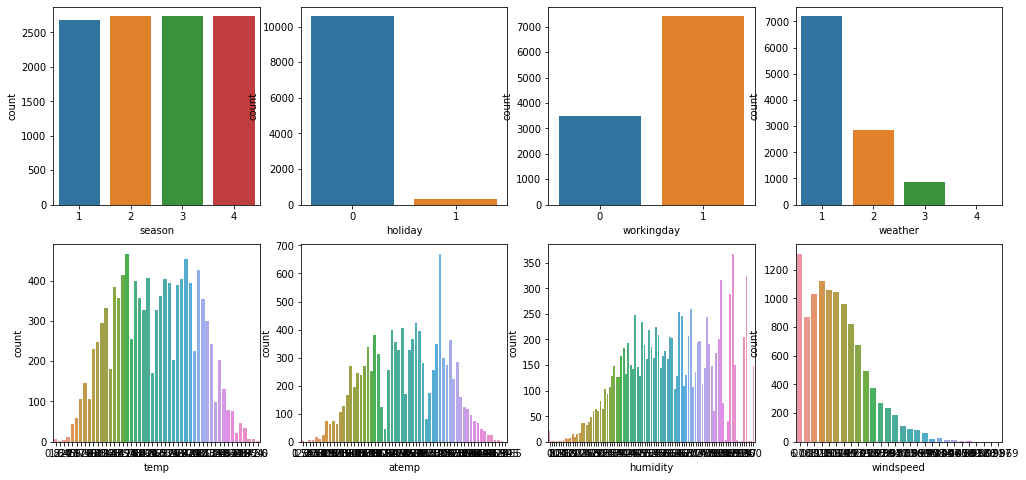

In [ ]:
plt.figure(figsize=(17,8))
for i, col in enumerate(test.columns[1:]):
  plt.subplot(2,4,i+1)
  sns.countplot(x=train[col]) # 개수 
plt.show()

*  test 피쳐 분포 확인

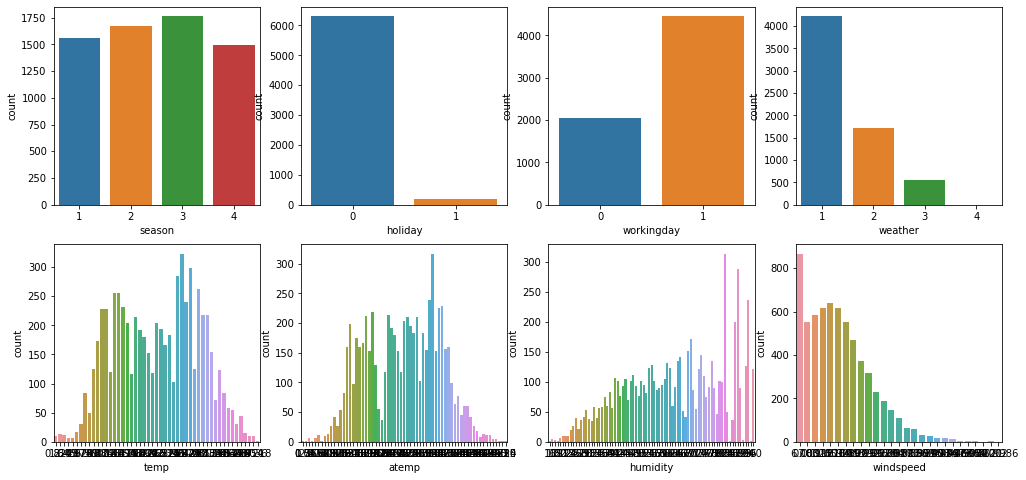

In [ ]:
plt.figure(figsize=(17,8))
for i, col in enumerate(test.columns[1:]):
  plt.subplot(2,4,i+1)
  sns.countplot(x=test[col]) # 개수 
plt.show()

* 피쳐 구분

In [ ]:
noms = ['season', 'holiday', 'workingday', 'weather']# 범주형
cont = ['temp', 'atemp', 'humidity', 'windspeed']# 연속형

## 전처리 : Basic
---

* output: df_train, X, y, X_train, y_train, X_valid, y_valid, X_test

### | 전처리 진행

* 전처리를 위해 데이터프레임 합치기

In [ ]:
df = pd.concat( [train[['count']+noms+cont], test[noms+cont]] )
print(train.shape, test.shape, df.shape)
# 훈련 데이터의 개수 바인딩
n_train = train.shape[0]
#df.head(3)
df.tail(3)

(10886, 12) (6493, 9) (17379, 9)


,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6490,NaN,1,0,1,1,10.66,12.880,60,11.0014
6491,NaN,1,0,1,1,10.66,13.635,56,8.9981
6492,NaN,1,0,1,1,10.66,13.635,65,8.9981


* 전처리
  * 'season', 'weather' 원-핫 인코딩
  * 'count' 로그값으로 변환한 'log_count' 생성

In [ ]:
# 해당 피쳐 사라지고, 새로운 피쳐 생성(원-핫 인코딩된)
df = pd.get_dummies(df, columns=['season', 'weather'])
df['log_count'] = np.log(df['count']+1)
df.head(1)

,count,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,log_count
0,16.0,0,0,9.84,14.395,81,0.0,1,0,0,0,1,0,0,0,2.833213


* 'count'와 'log_count' 분포비교

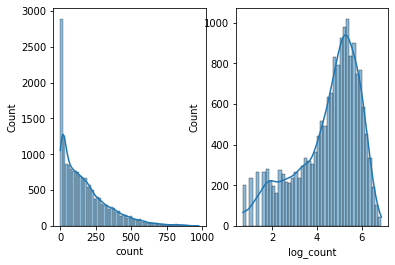

In [ ]:
plt.subplot(121)
sns.histplot(data=df, x='count', kde=True)
plt.subplot(122)
sns.histplot(data=df, x='log_count', kde=True)
plt.show()

### | 모델링에 사용할 변수 선택

* 전처리된 데이터 프레임의 피쳐 이름 확인

In [ ]:
list(df)

['count',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'log_count']

* 사용할 피쳐 선택

In [ ]:
selected = [
            'holiday',
            'workingday',
            'temp',
            'atemp',
            'humidity',
            'windspeed',
            'season_1',
            'season_2',
            'season_3',
            'season_4',
            'weather_1',
            'weather_2',
            'weather_3',
            'weather_4',
            ]

### | 데이터 분할

#### 훈련-테스트 데이터 분할

* 훈련 데이터 확인

* 테스트 데이터 확인


#### 훈련-검증 데이터 분할


```
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split()
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape
```

## EDA
---

* 훈련 데이터 확인

* 테스트 데이터 확인

### | 범주 자료 인사이트

* 범주 자료형 분포 시각화

* 범주 자료형 클래스별 타겟값 분포 확인

### | 수치자료 인사이트

* 수치자료형 분포 시각화

* 수치자료형과 타겟값 산점도

* 상관계수 시각화

## 전처리: Advence
---

* output: df_train, X, y, X_train, y_train, X_valid, y_valid, X_test

### | 전처리 진행을 위한 데이터 합치기

* 훈련 데이터 확인

* 테스트 데이터 확인

* 테스트 데이터 피쳐 기준으로 합치기

### | 피쳐 생성

#### 'datetime' 피쳐에서 월, 일, 시간 등 생성하기

#### 생성한 피쳐 시각화

* 새롭게 생성된 피쳐 분포 시각화

* 'hour' 속성에  따른 기타 범주 값 분포 시각화

### | 전처리 진행

* 현재 데이터프레임 확인

#### 원-핫 인코딩 
* season, weather

#### PCA를 통한 차원축소
* temp, atemp

#### 결측값 할당

* 'windspeed' 결측값 (0) 은 평균값으로 대체

#### 타겟값 로그변환
* 'log_count' 생성

### | 모델링에 사용할 변수 선택

* 전처리된 데이터 프레임의 피쳐 이름 확인

* 사용할 피쳐 선택

### | 데이터 분할

#### 훈련-테스트 데이터 분할

* 훈련 데이터 확인

* 테스트 데이터 확인


#### 훈련-검증 데이터 분할
```
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split()
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape
```

## 모델링
---

* input : X_train, X_valid, y_train, y_valid, X_test
* output: submission file

### | 평가 지표 정의 (RMSLE)

* RMSLE 정의

### | 회귀 모델 탐색

#### 모델링

#### 평가

* 성능평가

In [ ]:
for model in models:


  print (f'{model} [train] {rmsle(y_train, y_pred_train):.2f}  [valid] {rmsle(y_valid, y_pred_valid):.2f}')

* 타겟 분포 및 y true, y_pred 산점도

* 시각화

### | 그리드 서치로 모델 하이퍼파라미터 최적화

#### 모델링

* 랜덤 포레스트 그리드 서치

* LGBM 그리드 서치

#### 평가

* 성능평가

In [ ]:
for model in models:


  print (f'{model} [train] {rmsle(y_train, y_pred_train):.2f}  [valid] {rmsle(y_valid, y_pred_valid):.2f}')

* 시각화

### | 결과제출

#### 테스트 데이터 예측

* 최적화된 모델을 이용한 테스트 예측

#### submission 파일 작성

* submission 할당

* submission 파일 변환

#### 제출 결과 정리

* 전처리 - 그리드 서치 - 앙상블 :


## Pycaret
---

### | 환경세팅

* sklearn 버전 재세팅

```
!pip uninstall sklearn -y
!pip install --upgrade sklearn
!pip install scikit-learn==0.23.2 --user
```

* 버전 확인

```
import sklearn
sklearn.__version__
import sys
sys.version
```

* pycaret, Jinja2 설치

```
!pip install pycaret
!pip install Jinja2==3.0.1
```

* 코랩에서 사용가능하도록 설정

```
from pycaret.utils import enable_colab
enable_colab()
```

* pycaret regression 사용

```
from pycaret.regression import *
```

### | 데이터 셋업

### | 모델링

### | 최종 모델 선택 및 예측

### | 결과 제출